## American Express, Jp Morgan, Bank OF america, Credit Suisse 

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot
import cufflinks as cf

In [3]:
cf.go_offline()
init_notebook_mode(connected=False)

In [4]:
tickers = ["AXP","JPM","BAC","CS"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2009-1-1")["Adj Close"]

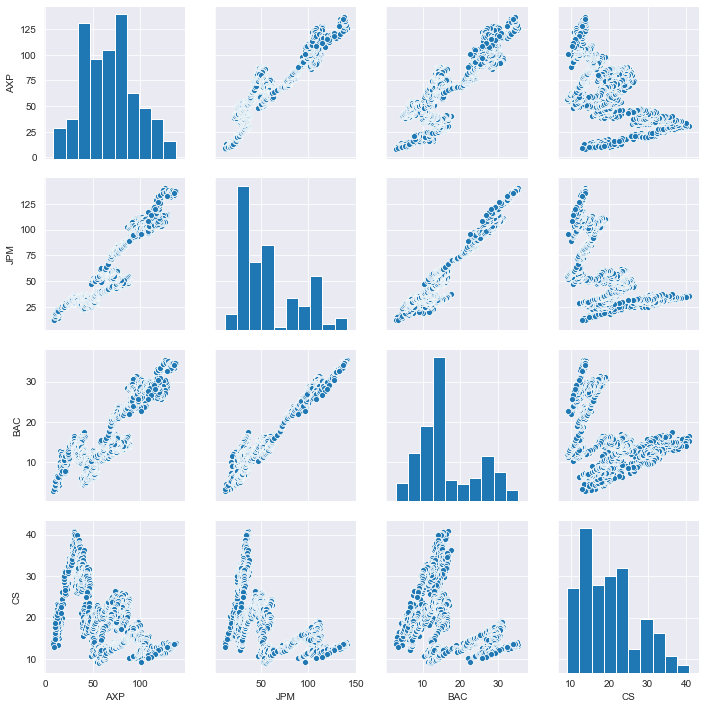

In [5]:
sns.set_style("darkgrid")
sns.pairplot(data,)

In [6]:
data.corr()

AXP       JPM       BAC        CS
AXP  1.000000  0.905573  0.841630 -0.607531
JPM  0.905573  1.000000  0.964468 -0.616966
BAC  0.841630  0.964468  1.000000 -0.428907
CS  -0.607531 -0.616966 -0.428907  1.000000

## Daily Cummultive Return

In [7]:
for t in tickers:
    data[f"{t} normal returns"] = data[t]/data[t].iloc[0]

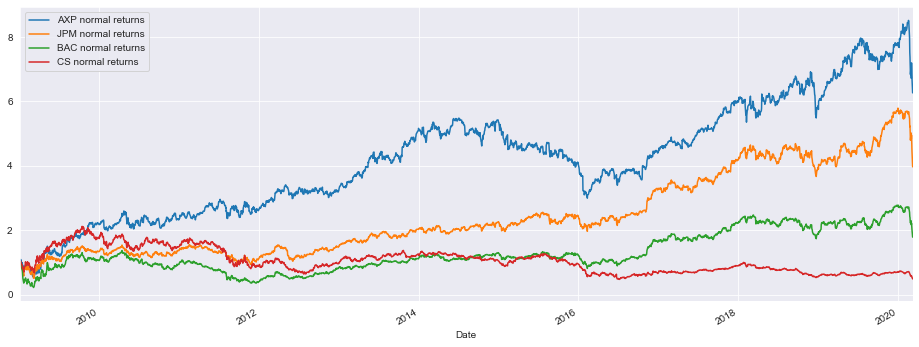

In [8]:
for t in tickers:
    data[f"{t} normal returns"].plot(figsize = (16,6))
    plt.legend()

## Allocation for each stock
## WE will assume 20,10,40,30%

In [9]:
weights = [0.2,0.1,0.4,0.3]
for stock,weight in zip(tickers,weights):
    data[f"{stock} allocation"] = data[f"{stock} normal returns"] * weight

In [10]:
data.head()

AXP        JPM        BAC         CS  AXP normal returns  \
Date                                                                         
2009-01-02  16.082691  24.213509  12.733791  19.298832            1.000000   
2009-01-05  16.598539  22.591551  12.422776  20.089043            1.032075   
2009-01-06  17.530380  23.078136  12.689362  19.836990            1.090015   
2009-01-07  16.791914  21.695606  12.182853  19.046783            1.044099   
2009-01-08  16.817083  21.023655  12.031786  18.794737            1.045664   

            JPM normal returns  BAC normal returns  CS normal returns  \
Date                                                                    
2009-01-02            1.000000            1.000000           1.000000   
2009-01-05            0.933014            0.975576           1.040946   
2009-01-06            0.953110            0.996511           1.027886   
2009-01-07            0.896012            0.956734           0.986940   
2009-01-08            0.868261            0.944871           0.973880   

            AXP allocation  JPM allocation  BAC allocation  CS allocation  
Date                                                                       
2009-01-02        0.200000        0.100000        0.400000       0.300000  
2009-01-05        0.206415        0.093301        0.390230       0.312284  
2009-01-06        0.218003        0.095311        0.398604       0.308366  
2009-01-07        0.208820        0.089601        0.382694       0.296082  
2009-01-08        0.209133        0.086826        0.377948       0.292164

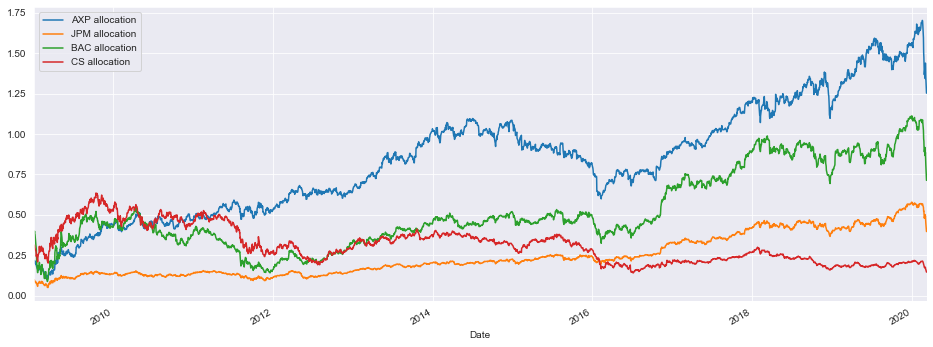

In [11]:
for t in tickers:
    data[f"{t} allocation"].plot(figsize = (16,6))
    plt.legend()

### We will take a look at the Position on a 50,000 investment at the beginning of the period

In [12]:
for t in tickers:
    data[f"{t} pos"] = data[f"{t} allocation"] * 50000

In [13]:
data.head()

AXP        JPM        BAC         CS  AXP normal returns  \
Date                                                                         
2009-01-02  16.082691  24.213509  12.733791  19.298832            1.000000   
2009-01-05  16.598539  22.591551  12.422776  20.089043            1.032075   
2009-01-06  17.530380  23.078136  12.689362  19.836990            1.090015   
2009-01-07  16.791914  21.695606  12.182853  19.046783            1.044099   
2009-01-08  16.817083  21.023655  12.031786  18.794737            1.045664   

            JPM normal returns  BAC normal returns  CS normal returns  \
Date                                                                    
2009-01-02            1.000000            1.000000           1.000000   
2009-01-05            0.933014            0.975576           1.040946   
2009-01-06            0.953110            0.996511           1.027886   
2009-01-07            0.896012            0.956734           0.986940   
2009-01-08            0.868261            0.944871           0.973880   

            AXP allocation  JPM allocation  BAC allocation  CS allocation  \
Date                                                                        
2009-01-02        0.200000        0.100000        0.400000       0.300000   
2009-01-05        0.206415        0.093301        0.390230       0.312284   
2009-01-06        0.218003        0.095311        0.398604       0.308366   
2009-01-07        0.208820        0.089601        0.382694       0.296082   
2009-01-08        0.209133        0.086826        0.377948       0.292164   

                 AXP pos      JPM pos       BAC pos        CS pos  
Date                                                               
2009-01-02  10000.000000  5000.000000  20000.000000  15000.000000  
2009-01-05  10320.747413  4665.071716  19511.512133  15614.190584  
2009-01-06  10900.153487  4765.549847  19930.217517  15418.283152  
2009-01-07  10440.985147  4480.062469  19134.682529  14804.095533  
2009-01-08  10456.635122  4341.307012  18897.413399  14608.192548

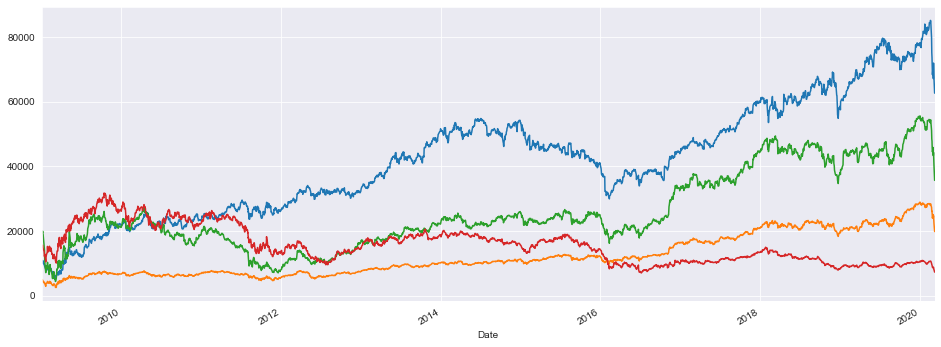

In [14]:
for t in tickers:
    data[f"{t} pos"].plot(figsize = (16,6))

## Total Returns

In [15]:
data.columns

Index(['AXP', 'JPM', 'BAC', 'CS', 'AXP normal returns', 'JPM normal returns',
       'BAC normal returns', 'CS normal returns', 'AXP allocation',
       'JPM allocation', 'BAC allocation', 'CS allocation', 'AXP pos',
       'JPM pos', 'BAC pos', 'CS pos'],
      dtype='object')

In [16]:
data["Total pos"] = data[['AXP pos','JPM pos', 'BAC pos', 'CS pos']].sum(axis = 1)

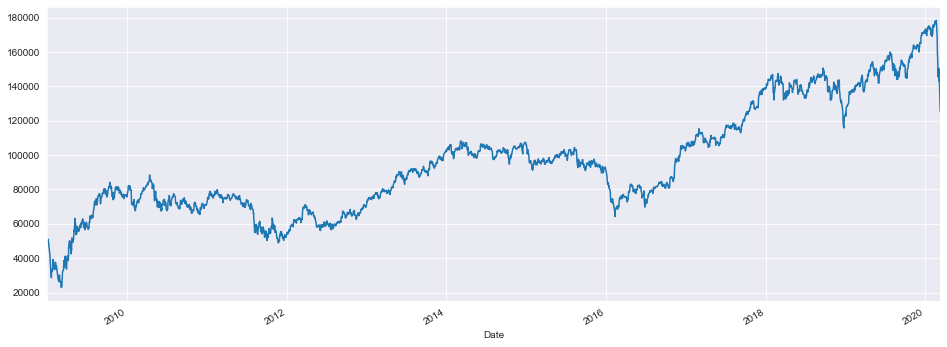

In [17]:
data["Total pos"].plot(figsize = (16,6))

## Daily Returns

In [18]:
data

AXP         JPM        BAC         CS  AXP normal returns  \
Date                                                                           
2009-01-02   16.082691   24.213509  12.733791  19.298832            1.000000   
2009-01-05   16.598539   22.591551  12.422776  20.089043            1.032075   
2009-01-06   17.530380   23.078136  12.689362  19.836990            1.090015   
2009-01-07   16.791914   21.695606  12.182853  19.046783            1.044099   
2009-01-08   16.817083   21.023655  12.031786  18.794737            1.045664   
...                ...         ...        ...        ...                 ...   
2020-03-03  108.010002  116.959999  27.574059  10.930000            6.715916   
2020-03-04  115.699997  119.849998  28.209999  11.210000            7.194069   
2020-03-05  110.940002  113.970001  26.780001  10.580000            6.898099   
2020-03-06  108.239998  108.080002  25.709999  10.350000            6.730217   
2020-03-09  100.739998   96.050003  22.705000   9.370000            6.263877   

            JPM normal returns  BAC normal returns  CS normal returns  \
Date                                                                    
2009-01-02            1.000000            1.000000           1.000000   
2009-01-05            0.933014            0.975576           1.040946   
2009-01-06            0.953110            0.996511           1.027886   
2009-01-07            0.896012            0.956734           0.986940   
2009-01-08            0.868261            0.944871           0.973880   
...                        ...                 ...                ...   
2020-03-03            4.830361            2.165424           0.566356   
2020-03-04            4.949716            2.215365           0.580864   
2020-03-05            4.706877            2.103066           0.548220   
2020-03-06            4.463624            2.019037           0.536302   
2020-03-09            3.966794            1.783051           0.485522   

            AXP allocation  JPM allocation  BAC allocation  CS allocation  \
Date                                                                        
2009-01-02        0.200000        0.100000        0.400000       0.300000   
2009-01-05        0.206415        0.093301        0.390230       0.312284   
2009-01-06        0.218003        0.095311        0.398604       0.308366   
2009-01-07        0.208820        0.089601        0.382694       0.296082   
2009-01-08        0.209133        0.086826        0.377948       0.292164   
...                    ...             ...             ...            ...   
2020-03-03        1.343183        0.483036        0.866170       0.169907   
2020-03-04        1.438814        0.494972        0.886146       0.174259   
2020-03-05        1.379620        0.470688        0.841226       0.164466   
2020-03-06        1.346043        0.446362        0.807615       0.160891   
2020-03-09        1.252775        0.396679        0.713220       0.145656   

                 AXP pos       JPM pos       BAC pos        CS pos  \
Date                                                                 
2009-01-02  10000.000000   5000.000000  20000.000000  15000.000000   
2009-01-05  10320.747413   4665.071716  19511.512133  15614.190584   
2009-01-06  10900.153487   4765.549847  19930.217517  15418.283152   
2009-01-07  10440.985147   4480.062469  19134.682529  14804.095533   
2009-01-08  10456.635122   4341.307012  18897.413399  14608.192548   
...                  ...           ...           ...           ...   
2020-03-03  67159.159398  24151.807363  43308.481774   8495.333038   
2020-03-04  71940.694230  24748.581551  44307.305352   8712.962582   
2020-03-05  68980.993985  23534.383859  42061.315358   8223.295552   
2020-03-06  67302.167633  22318.120763  40380.745020   8044.528612   
2020-03-09  62638.769008  19833.970494  35661.020818   7282.824096   

                Total pos  
Date                       
2009-01-02   50000.000000  
2009-01-05   50111.521845  
200

In [23]:
daily_returns = data[['AXP', 'JPM', 'BAC', 'CS']].pct_change()

In [24]:
daily_returns

AXP       JPM       BAC        CS
Date                                              
2009-01-02       NaN       NaN       NaN       NaN
2009-01-05  0.032075 -0.066986 -0.024424  0.040946
2009-01-06  0.056140  0.021538  0.021459 -0.012547
2009-01-07 -0.042125 -0.059906 -0.039916 -0.039835
2009-01-08  0.001499 -0.030972 -0.012400 -0.013233
...              ...       ...       ...       ...
2020-03-03 -0.051462 -0.037525 -0.055158 -0.038698
2020-03-04  0.071197  0.024709  0.023063  0.025618
2020-03-05 -0.041141 -0.049061 -0.050691 -0.056200
2020-03-06 -0.024338 -0.051680 -0.039955 -0.021739
2020-03-09 -0.069290 -0.111306 -0.116881 -0.094686

[2814 rows x 4 columns]

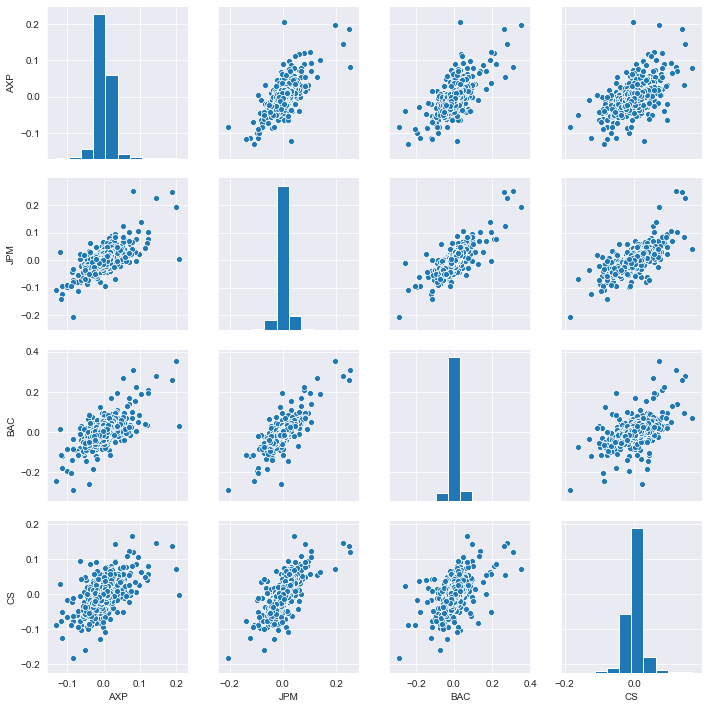

In [26]:
sns.pairplot(daily_returns)

## Random allocations

In [68]:
stocks = data[['AXP', 'JPM', 'BAC', 'CS']]

In [232]:
number_of_port =  3000
all_weights = np.zeros((number_of_port, len(stocks.columns)))
all_returns = np.zeros(number_of_port)
all_vol = np.zeros(number_of_port)
all_sharps = np.zeros(number_of_port)

for ind in range(number_of_port):
    weights = np.array(np.random.random(4))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights 
    
    all_returns[ind] = np.sum(daily_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    all_sharps[ind] = all_returns[ind]/all_vol[ind]

In [233]:
max_sharp = all_sharps.argmax()

In [234]:
lowest_vol = all_vol.argmin()

In [235]:
highest_return = all_returns.argmax()

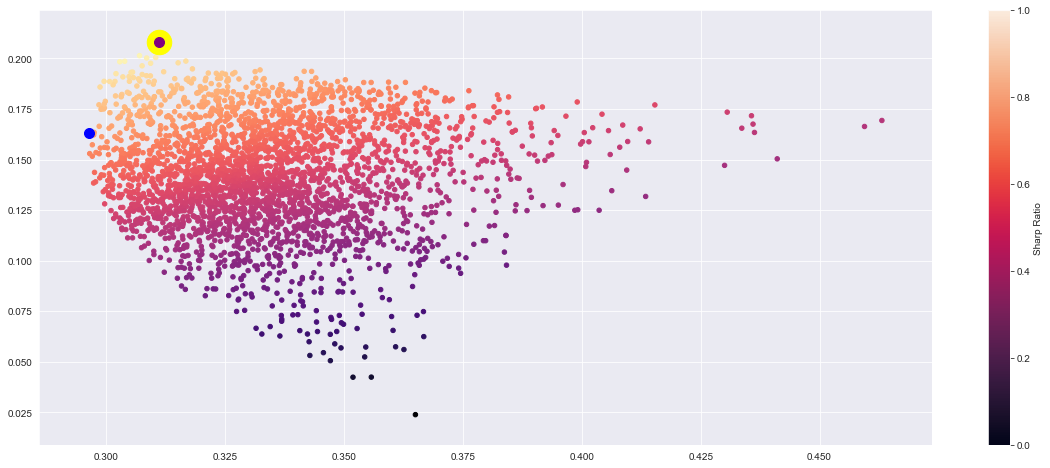

In [236]:
plt.figure(figsize=(20,8))
plt.scatter(all_vol, all_returns, c = all_sharps, cmap="magma", s = 20)
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], s = 600, c = "yellow")
plt.scatter(all_vol[highest_return], all_returns[highest_return], s = 100, c = "purple")
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], s =100, c = "blue")
plt.colorbar(label = 'Sharp Ratio')

## Lets approach this mathmatically with markowitz effieicnt frontier and portfolio optimization

In [247]:
def get_ret_vol_sharp(weights):
    weights =np.array(weights)
    ret = np.sum(daily_returns.mean() * weights * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(daily_Returns_port.cov() * 252, weights)))
    sharp = ret/vol
    return np.array([ret,vol,sharp])

In [248]:
def mini_sharp(weights):
    return get_ret_vol_sharp(weights)[2] * -1

In [249]:
def check_Sum (weights):
    return np.sum(weights) - 1

In [250]:
bounds = ((0,1),) * len(stocks.columns)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [251]:
initial_guess = [0.25] * len(stocks.columns)
initial_guess

[0.25, 0.25, 0.25, 0.25]

In [252]:
const = {"type":"eq", "fun": check_Sum}

In [253]:
from scipy.optimize import minimize

In [254]:
best_outcome = minimize(minimize_sharp,initial_guess,method="SLSQP",bounds=b, constraints=constrain)

In [255]:
best_outcome

     fun: -0.6815968984450393
     jac: array([-7.24196434e-06,  4.50164080e-05,  2.12116003e-01,  4.74051297e-01])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([8.61450333e-01, 1.38549667e-01, 1.20563282e-16, 3.55401472e-16])

In [256]:
ret_vol_sharp(best_outcome.x)

array([0.20914932, 0.30685192, 0.6815969 ])

### The best situation here is a sharp ratio of .68 Not too good for an investor. WE ill plot the efficient frontier on a graph

In [287]:
frontier_y = np.linspace(0.0,0.209,200)

In [288]:
def mini_vol(weights):
    return ret_vol_sharp(weights)[1]

In [289]:
frontier_vol = []

In [290]:
for pos_return in frontier_y:
    con = ({"type":"eq", "fun": check_weights}, {"type":"eq", "fun": lambda w: ret_vol_sharp(w)[0] - pos_return})
    result = minimize(mini_vol, initial_guess, method="SLSQP", bounds=b, constraints=con)
    frontier_vol.append(result["fun"])

In [291]:
len(frontier_vol)

200

In [292]:
len(frontier_y)

200

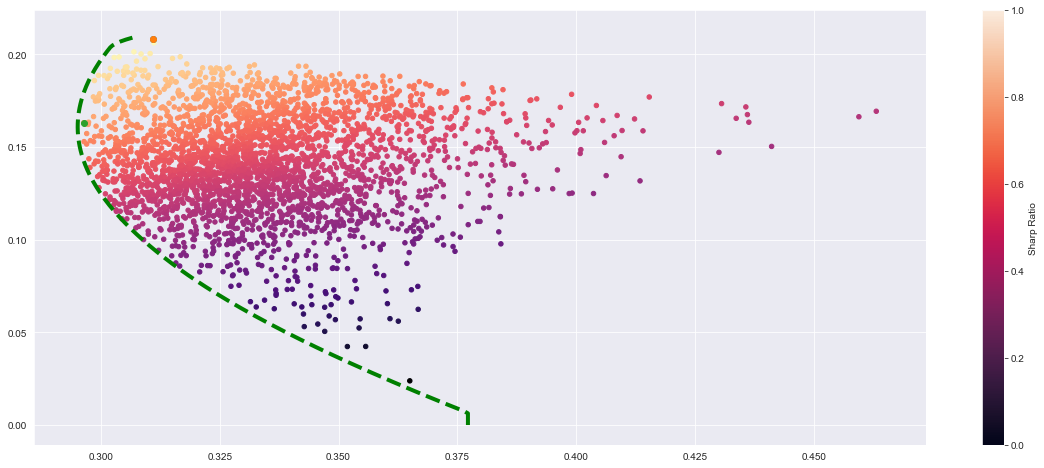

In [293]:
plt.figure(figsize=(20,8))
plt.scatter(all_vol, all_returns, c = all_sharps, cmap="magma", s = 20)
plt.scatter(all_vol[max_sharp], all_returns[max_sharp])
plt.scatter(all_vol[highest_return], all_returns[highest_return])
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol])
plt.plot(frontier_vol, frontier_y, "g--", lw = 4)
plt.colorbar(label = 'Sharp Ratio')

### Linear regression to predict JPM

In [294]:
stocks.columns

Index(['AXP', 'JPM', 'BAC', 'CS'], dtype='object')

In [297]:
X = stocks.drop("JPM", axis=1)
y = stocks["JPM"]

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [298]:
from sklearn.linear_model import LinearRegression

In [299]:
model = LinearRegression()

In [302]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
predictions = model.predict(X_test)

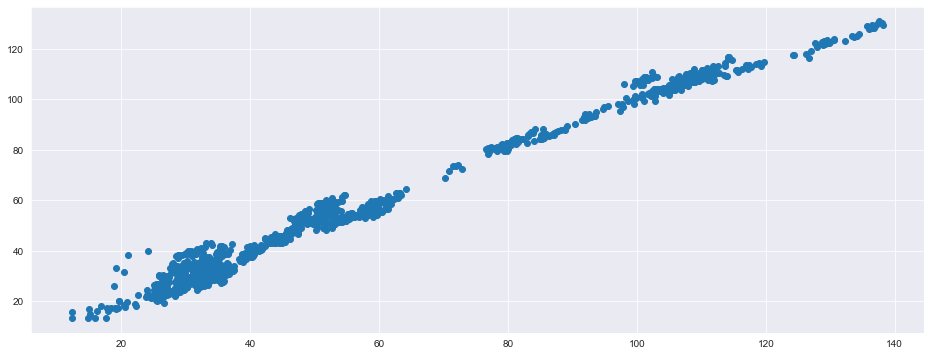

In [305]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predictions)

# Coefficients

In [316]:
pd.DataFrame(model.coef_, index=X.columns, columns=["Coeff"])

Coeff
AXP  0.166903
BAC  3.023587
CS  -0.885850

## Residuals

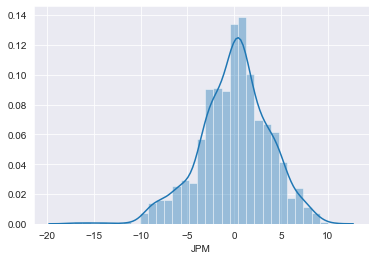

In [306]:
sns.distplot(y_test-predictions)

## Metrics 

In [307]:
from sklearn import metrics

In [308]:
metrics.mean_absolute_error(y_test,predictions)

2.8450853298398227

In [309]:
metrics.mean_squared_error(y_test,predictions)

13.659447360000735

In [310]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.695868958716033